In [1]:
# prerequisites
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd

<h3>Family - v1,v2,v3 </h3>


In [5]:
# load data and consider a single feature (Family) and the output to be estimated (happiness)

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) if data[i][selectedVariable] != '' else None for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) if data[i][selectedOutput] != '' else None for i in range(len(data))]

    df = pd.DataFrame({
        inputVariabName: inputs,
        outputVariabName: outputs
    })

    df.dropna()
    inputs = df[inputVariabName].tolist()
    outputs = df[outputVariabName].tolist()


    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [6]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

#plotDataHistogram(inputs, 'Family')
#plotDataHistogram(outputs, 'Happiness score')

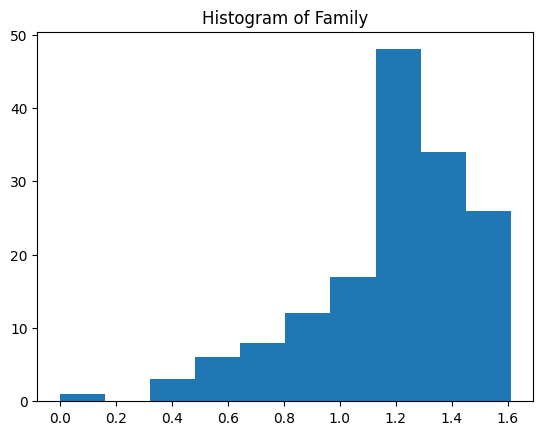

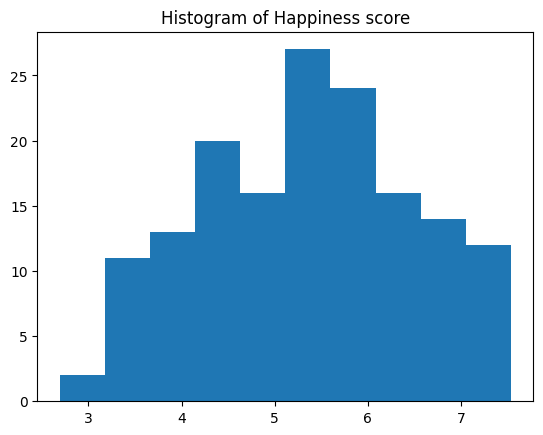

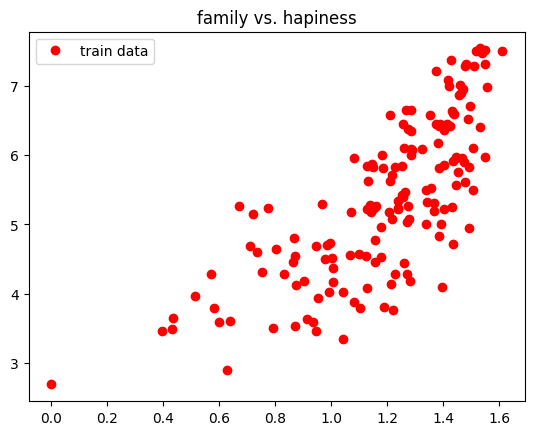

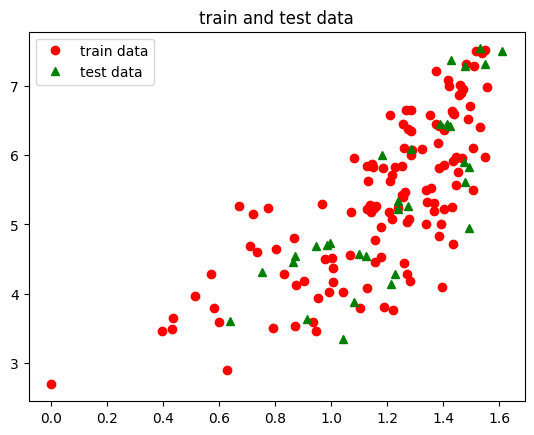

the learnt model: f(x) =  2.039013930022846  +  [2.80491362]  * x


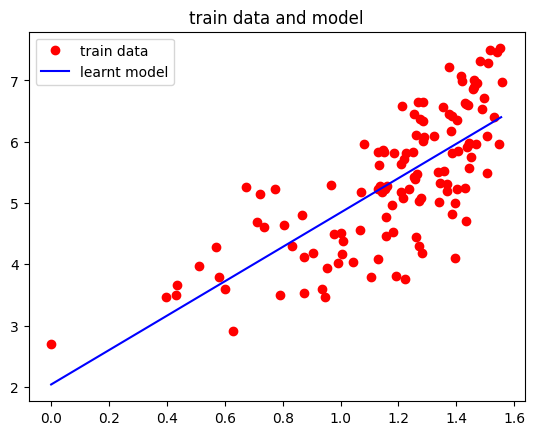

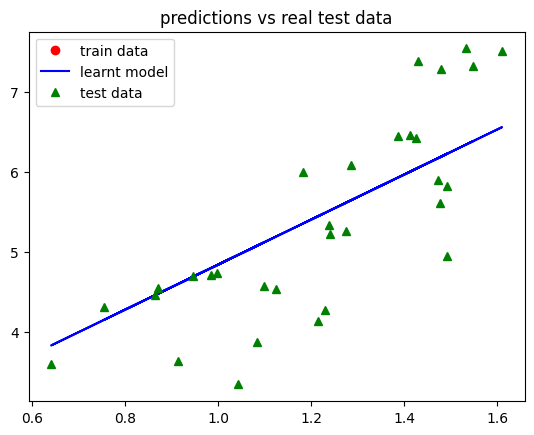

prediction error (manual):  0.6051231125473607
prediction error (tool):  0.6051231125473606


In [7]:
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')

plotDataHistogram(inputs, 'Family')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputs, outputs, [], [], [], [], 'family vs. hapiness')

######################################################################################################
#Pasul 2, impartirea datelor pe train si validation

# split data into training data (80%) and testing data (20%)
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")

######################################################################################################
#Pasul 3 cu invatare model (cu tool generic si cu tool de least square)

# training step
xx = [[el] for el in trainInputs]
regressor = linear_model.LinearRegression()
# regressor = linear_model.SGDRegressor(max_iter =  10000)
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


######################################################################################################
#Pasul 4 plot rezultate (model invatat, predictii)

# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]
plotData(trainInputs, trainOutputs, xref, yref, [], [], title = "train data and model")

#makes predictions for test data
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
#makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs, "predictions vs real test data")


######################################################################################################
#Pasul 5 - calcul metrici de performanta (eroarea)
#compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)